In [121]:
import numpy as np  # http://www.numpy.org
import matplotlib.pyplot as plt   # http://matplotlib.org
import math as M
from scipy.optimize import fsolve

In [122]:
# Import Data from Simple Model

%store -r var1_T_0
%store -r var1_T_2

%store -r var2_T_0
%store -r var2_T_2
%store -r var2_rho

%store -r var3_T_0
%store -r var3_T_2
%store -r var3_rho

%store -r var4_W

%store -r var5_W

%store -r var6_W

# Simple, conceptual model of marginal sea

In [125]:
############ Initilisation #################
############################################

#### Constants #####
L_x = 1e6                                          # [m] zonal extent 
L_y = 2e6                                          # [m] meridional extent 
A = L_x*L_y                                        # [m^2] surface area of interior 
P = 2*L_x+2*L_y                                    # [m] Perimeter 

g = 9.81                                           # [m/s^2] gravitational acceleration 
C_p = 3.994e3                                      # [J/(kg K)] specific heat capacity of sea water 
s = 0.02                                           # [] average bottom slope around the perimeter of the marginal sea
f_0 = 1.2e-4                                       # [s^-1] Coriolis parameter 
alpha_T = 0.2                                      # [kg m^-3 C^-1] thermal expansion coefficient; source: Ypma[2020]
alpha_S = 0.8                                      # [kg m^-3] Haline expansion coefficient
rho_ref = 1028                                     # [kg m^-3] reference density sea water; source: Wikipedia
T_ref = 8                                          # [Celcius] reference temperature sea water; source: Wikipedia
S_ref = 35                                         # [ppt] reference salinity sea water; source: Wikipedia

#### Parameters ####
num_val = 100
A_T_1 = np.append(8.87, np.linspace(7,11,num_val))       # [Celsius] ingoing temperature 
A_S_1 = np.append(35.2, np.linspace(34.6,35.3,num_val))  # [g kg^-1] incoming salinity; source Lamber ! is ppt = g kg^-1 ???
A_T_A = np.append(2.8, np.linspace(0,7,num_val))         # [Celsius] Atmospheric temperature 
A_E = np.append(-2e-8,np.linspace(0,-5e-8,num_val))      # [ppt] net evaporation minus precipitation
A_Gamma = np.append(10,np.linspace(10,100,num_val))        # [W/(m^2 C)] Restoring strength 
A_H = np.append(1000, np.linspace(600,1200,num_val))     # [m] sill height 
A_c = np.append(0.006, np.linspace(0.003,0.009,num_val)) # [] eddy coefficient 

#### Preparation #####
T_0 = np.zeros(num_val)
T_2 = np.zeros(num_val)
S_0 = np.zeros(num_val)
S_2 = np.zeros(num_val)
A_D_rho = np.zeros(num_val)
A_W1 = np.zeros(num_val)
A_W2 = np.zeros(num_val)
Delta_T = np.zeros(num_val)
M_D_rho = np.zeros((num_val, num_val))

In [126]:
############# Computation ##################
############################################

#### Main equations ####

def main(x): # function with seven unkowns:  T_0,  T_2,  S_0,  S_2,  V_1, T_eddy, S_eddy 
             #                              x[0], x[1], x[2], x[3], x[4],   x[5],   x[6]
    return [P*H*x[5]-A*Gamma*(x[0]-T_A)/(rho_ref*C_p),
            P*H*x[6]+A*E*S_ref,
            (T_1-x[1])*x[4]*H*L-(x[0] - T_A + (P*L/A)*(T_1-T_A))*A*Gamma/(rho_ref*C_p),
            (S_1-x[3])*x[4]*H*L+E*A*S_ref+P*L*E*S_ref,
            g*H/(2*rho_ref*f_0*L)*(alpha_T*(T_1-x[0])-alpha_S*(S_1-x[2]))-x[4],
            c*x[4]*(T_1-x[0])-x[5],
            c*x[4]*(S_1-x[2])-x[6]]

#### Follow up computations ####

def Delta_density(T, T_ref, S, S_ref):                      
    return ((-alpha_T*(T-T_ref) + alpha_S*(S-S_ref)))

def downwelling(T_1, T_2, S_1, S_2, H):
    return (-1)*g*H**2*(-alpha_T*(T_1-T_2)+alpha_S*(S_1-S_2))/(4*rho_ref*f_0)

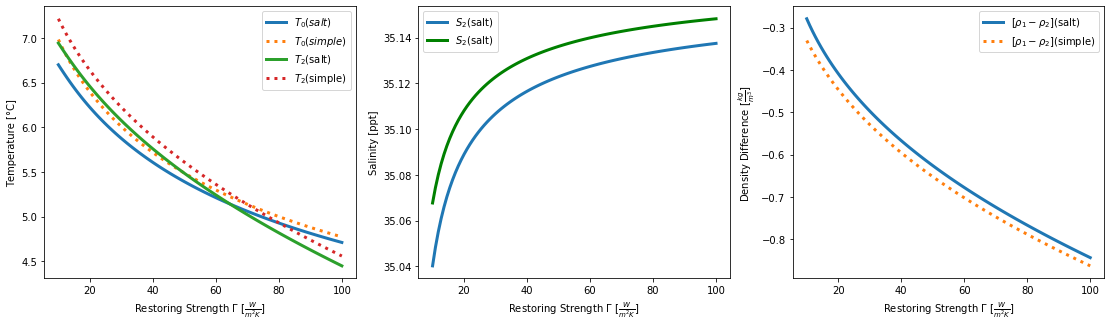

In [127]:
################ Output ####################
############################################

y=3

if y==1:          ######## temperature_T_1_plot ##########
    for i in range(num_val):
        c, T_1, S_1, T_A, E, Gamma, H  = A_c[0], A_T_1[1::][i] , A_S_1[0], A_T_A[0], A_E[0], A_Gamma[0], A_H[0] 
        L = H/s  # [m] width of sloping topography of the boundary current 
        [T_0[i],T_2[i],S_0[i],S_2[i],V_1,T_eddy,S_eddy] = fsolve(main, [1,1,1,1,1,1,1])
        
    x_values = A_T_1[1::]
    y_values = [T_0, var1_T_0, T_2, var1_T_2]
    xlabel = r'Incoming Tempreature $T_1$ [°C]'
    ylabel = 'Temperature [°C]'
    label = [r'$T_0$(salt)',r'$T_0$(simple)', r'$T_2$(salt)',r'$T_2$(simple)']
    
    fig, axs = plt.subplots(1, 1, figsize=(19, 5))
    axs.plot(x_values, y_values[0], linewidth=3, label=label[0])
    axs.plot(x_values, y_values[1], linewidth=3, label=label[1], linestyle=':')
    axs.plot(x_values, y_values[2], linewidth=3, label=label[2])
    axs.plot(x_values, y_values[3], linewidth=3, label=label[3],linestyle=':')
    axs.set(xlabel=xlabel, ylabel=ylabel)
    axs.legend(loc='best')
    #plt.show()
    plt.savefig('temperature_T_1_plot.png', dpi=300, bbox_inches='tight')       

if y==2:          ######## Varying Eddy Coefficient c ##########
    for i in range(num_val):
        c, T_1, S_1, T_A, E, Gamma, H  = A_c[1::][i], A_T_1[0], A_S_1[0], A_T_A[0], A_E[0], A_Gamma[0], A_H[0] 
        L = H/s  # width of sloping topography of the boundary current 
        [T_0[i],T_2[i],S_0[i],S_2[i],V_1,T_eddy,S_eddy] = fsolve(main, [1,1,1,1,1,1,1])
        A_D_rho[i]=Delta_density(T_1, T_2[i], S_1, S_2[i])

    x_values = A_c[1::] 
    y_values = [T_0, var2_T_0, T_2, var2_T_2, S_0,S_2, A_D_rho, var2_rho] #, A_Q, A_Delta, A_W
    xlabel = r'Eddy Coefficient $c$ []'
    ylabel = ['Temperature [°C]', 'Salinity [ppt]', r'Density Difference [$\frac{kg}{m^3}$]']
    label = [r'$T_0$(salt)',r'$T_0$(simple)', r'$T_2$(salt)',r'$T_2$(simple)', r'$S_2$(salt)', r'$S_2$(salt)', r'$[\rho_1 - \rho_2]$(salt)',r'$[\rho_1 - \rho_2]$(simple)']  # more labels when simple code is included
    
    fig, axs = plt.subplots(1, 3, figsize=(19, 5))
    axs[0].plot(x_values, y_values[0], linewidth=3, label=label[0])
    axs[0].plot(x_values, y_values[1], linewidth=3, label=label[1], linestyle=':')
    axs[0].plot(x_values, y_values[2], linewidth=3, label=label[2])
    axs[0].plot(x_values, y_values[3], linewidth=3, label=label[3],linestyle=':')
    axs[0].set(xlabel=xlabel, ylabel=ylabel[0])
    axs[0].legend(loc='best')
    axs[1].plot(x_values, y_values[4], linewidth=3, label=label[4])
    axs[1].plot(x_values, y_values[5], linewidth=3, label=label[5], color='green')
    axs[1].set(xlabel=xlabel, ylabel=ylabel[1])
    axs[1].legend(loc='best')
    axs[2].plot(x_values, y_values[6], linewidth=3, label=label[6])
    axs[2].plot(x_values, y_values[7], linewidth=3, label=label[7], linestyle=':')
    axs[2].set(xlabel=xlabel, ylabel=ylabel[2])
    axs[2].legend(loc='best')
    #plt.show()
    plt.savefig('eddy.png', dpi=300, bbox_inches='tight')       
    
elif y==3:          ######## Varying Restoring strength Gamma ##########
    for i in range(num_val):
        c, T_1, S_1, T_A, E, Gamma, H  = A_c[0], A_T_1[0], A_S_1[0], A_T_A[0], A_E[0], A_Gamma[1::][i], A_H[0] 
        L = H/s  # [m] width of sloping topography of the boundary current 
        [T_0[i],T_2[i],S_0[i],S_2[i],V_1,T_eddy,S_eddy] = fsolve(main, [1,1,1,1,1,1,1])
        A_D_rho[i]=Delta_density(T_1, T_2[i], S_1, S_2[i])
        
    x_values = A_Gamma[1::] 
    y_values = [T_0, var3_T_0, T_2, var3_T_2, S_0, S_2, A_D_rho, var3_rho]
    xlabel = r'Restoring Strength $\Gamma$ [$\frac{W}{m^2 K}$]'
    ylabel = ['Temperature [°C]', 'Salinity [ppt]', r'Density Difference [$\frac{kg}{m^3}$]']
    label = [r'$T_0(salt)$', r'$T_0(simple)$', r'$T_2$(salt)', r'$T_2$(simple)', r'$S_2$(salt)', r'$S_2$(salt)', r'$[\rho_1 - \rho_2]$(salt)',r'$[\rho_1 - \rho_2]$(simple)']  # more labels when simple code is included
    
    fig, axs = plt.subplots(1, 3, figsize=(19, 5))
    axs[0].plot(x_values, y_values[0], linewidth=3, label=label[0])
    axs[0].plot(x_values, y_values[1], linewidth=3, label=label[1], linestyle=':')
    axs[0].plot(x_values, y_values[2], linewidth=3, label=label[2])
    axs[0].plot(x_values, y_values[3], linewidth=3, label=label[3], linestyle=':')
    axs[0].set(xlabel=xlabel, ylabel=ylabel[0])
    axs[0].legend(loc='best')
    axs[1].plot(x_values, y_values[4], linewidth=3, label=label[4])
    axs[1].plot(x_values, y_values[5], linewidth=3, label=label[5], color='green')
    axs[1].set(xlabel=xlabel, ylabel=ylabel[1])
    axs[1].legend(loc='best')
    axs[2].plot(x_values, y_values[6], linewidth=3, label=label[6])
    axs[2].plot(x_values, y_values[7], linewidth=3, label=label[7], linestyle=':')
    axs[2].set(xlabel=xlabel, ylabel=ylabel[2])
    axs[2].legend(loc='best')
    #plt.show()
    plt.savefig('Gamma.png', dpi=300, bbox_inches='tight')   

if y==4:          ######## Downwelling with Sill Depth ##########
    for i in range(num_val):
        c, T_1, S_1, T_A, E, Gamma, H  = A_c[0], A_T_1[0], A_S_1[0], A_T_A[0], A_E[0], A_Gamma[0], A_H[1::][i] 
        L = H/s  # [m] width of sloping topography of the boundary current 
        [T_0[i],T_2[i],S_0[i],S_2[i],V_1,T_eddy,S_eddy] = fsolve(main, [1,1,1,1,1,1,1])
        A_W[i] = downwelling(T_1, T_2[i], S_1, S_2[i], H)

    x_values = A_H[1::]
    y_values = A_W, var4_W
    xlabel = 'Sill Depth $H$ [m]'
    ylabel =  r'Meridional Overturning Strength [$\frac{m^2}{s}$]'
    label = ['Salt Model','Simple Model']
    
    fig, axs = plt.subplots(1, 1, figsize=(7, 5))
    axs.plot(x_values, y_values[0], linewidth=3, label=label[0])
    axs.plot(x_values, y_values[1], linewidth=3, linestyle=':', label=label[1])
    axs.set(xlabel=xlabel, ylabel=ylabel)
    axs.legend(loc='center right')
    plt.ticklabel_format(style = 'plain')
    #plt.show()
    plt.savefig('W_vs_H.png', dpi=300, bbox_inches='tight')   
    
if y==5:          ######## Downwelling with incoming Tempereature ##########
    for i in range(num_val):
        c, T_1, S_1, T_A, E, Gamma, H  = A_c[0], A_T_1[1::][i] , A_S_1[0], A_T_A[0], A_E[0], A_Gamma[0], A_H[0]
        L = H/s  # [m] width of sloping topography of the boundary current 
        [T_0[i],T_2[i],S_0[i],S_2[i],V_1,T_eddy,S_eddy] = fsolve(main, [1,1,1,1,1,1,1])
        A_W1[i] = downwelling(T_1, T_2[i], S_1, S_2[i], H)*1e-6
        
    for j in range(num_val):
        c, T_1, S_1, T_A, E, Gamma, H  = A_c[0], A_T_1[0] , A_S_1[0], A_T_A[0], A_E[0], A_Gamma[1::][j], A_H[0]
        L = H/s  # [m] width of sloping topography of the boundary current 
        [T_0[j],T_2[j],S_0[j],S_2[j],V_1,T_eddy,S_eddy] = fsolve(main, [1,1,1,1,1,1,1])
        A_W2[j] = downwelling(T_1, T_2[j], S_1, S_2[j], H)*1e-6

    x_values = [A_T_1[1::], A_Gamma[1::]]
    y_values = [A_W1, var5_W, A_W2, var6_W]
    xlabel = [r'Incoming Temperature $T_1$[°C]',r'Restoring Strength $\Gamma$ [$\frac{W}{m^2 K}$]']
    ylabel =  r'Meridional Overturning Strength W [$\frac{m^2}{s}\times 10^{6}$]'
    label = ['Salt Model','Simple Model']
    
    fig, axs = plt.subplots(1, 2,figsize=(10, 4))
    axs[0].plot(x_values[0], y_values[0], linewidth=3, label=label[0])
    axs[0].plot(x_values[0], y_values[1], linewidth=3, linestyle=':', label=label[1])
    axs[0].set(xlabel=xlabel[0], ylabel=ylabel)
    axs[0].legend(loc='best')
    axs[0].set(ylim=[3.5,14.5])
    axs[1].plot(x_values[1], y_values[2], linewidth=3, label=label[0])
    axs[1].plot(x_values[1], y_values[3], linewidth=3, linestyle=':', label=label[1])
    axs[1].set(xlabel=xlabel[1], ylabel=ylabel)
    axs[1].legend(loc='best')
    axs[1].set(ylim=[3.5,14.5])
    #plt.show()
    plt.savefig('W.png', dpi=300, bbox_inches='tight')   
    
    
if y==7:          ######## Contour: evaporation and restoring strength for density difference ##########
    for i in range(num_val):
        E =  A_E[1::][i]
        for j in range(num_val):
            c, T_1, S_1, T_A, Gamma, H  = A_c[0], A_T_1[0] , A_S_1[0], A_T_A[0], A_Gamma[1::][j], A_H[0]
            L = H/s  # [m] width of sloping topography of the boundary current 
            [T_0[i],T_2[i],S_0[i],S_2[i],V_1,T_eddy,S_eddy] = fsolve(main, [1,1,1,1,1,1,1])
            M_D_rho[i,j]=Delta_density(T_1, T_2[i], S_1, S_2[i])

    x = A_Gamma[1::]
    y = A_E[1::]*1e8
    z = M_D_rho
    xlabel = r'Restoring Strength $\Gamma$ [$\frac{W}{m^2 K}$]'
    ylabel =  r'Meridional Overturning Strength W [$\frac{m^2}{s} \times 10^{6} $]'
    label = ['Salt Model','Simple Model']
    
    fig = plt.figure()
    cp = plt.contourf(x,y,z[:,:])
    cbar = plt.colorbar(cp)
    cbar.set_label(r'Density Difference [$\frac{kg}{m^3}$]')
    plt.xlabel(r'Restoring Strength $\Gamma$ [$\frac{W}{m^2 K}$]')
    plt.ylabel(r'Net Evaporation minus Precipitation E [$\frac{m}{s} \times 10^{-8}$]')
    #plt.show()
    plt.savefig('Contour-salt.png', dpi=300, bbox_inches='tight') 